In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import scipy.stats as stats

In [ ]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
!cp randhrs1992_2022v1.sav /content/drive/MyDrive/


cp: cannot stat 'randhrs1992_2022v1.sav': No such file or directory


In [ ]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
!pip install pyreadstat



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.7/617.7 kB 8.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pyreadstat

file_path = "/content/drive/MyDrive/randhrs1992_2022v1.sav"
df, meta = pyreadstat.read_sav(file_path, row_limit=10000)

print("Dataset shape:", df.shape)

Dataset shape: (10000, 19880)


In [ ]:
# Display all columns and their data types
df.dtypes


,0
HHIDPN,float64
S1HHIDPN,float64
R1MSTAT,float64
R1MPART,float64
S1BMONTH,float64
...,...
R13LBSATWLF,float64
R14LBSATWLF,float64
R15LBSATWLF,float64
R16LBSATWLF,float64


In [ ]:
## Get columns of the first wave
wave = 1
wave_one = df.filter(regex = f"^(RA|R{wave})[a-zA-Z]+", axis = 1)
print(wave_one.shape)
print(wave_one.columns.to_list()[0:50])

(10000, 546)
['R1MSTAT', 'R1MPART', 'RASPID1', 'RASPID2', 'RASPID3', 'RASPID4', 'RASPCT', 'R1MRCT', 'R1MLEN', 'R1MCURLN', 'R1MLENM', 'R1MDIV', 'R1MWID', 'R1MNEV', 'R1MEND', 'R1MSTATH', 'R1MSTATF', 'R1CENREG', 'R1CENDIV', 'R1FAMR', 'R1FINR', 'RAOAHDID', 'RAOHRSID', 'RAOVRLAP', 'RAGENDER', 'RAHISPAN', 'RARACEM', 'RABMONTH', 'RABYEAR', 'RABDATE', 'RABFLAG', 'R1IWBEG', 'R1IWEND', 'R1IWBEGF', 'R1IWENDF', 'R1IWMID', 'R1IWMIDF', 'R1PROXY', 'R1IWSTAT', 'RADMONTH', 'RADYEAR', 'RADDATE', 'RADSRC', 'RADTIMTDTH', 'RADAGE_M', 'RADAGE_Y', 'RAEDYRS', 'RAEDEGRM', 'RAEDUC', 'RABPLACF']


In the missing data matrix, black bars represent present values and white bars represent missing values.The pattern appears random, with no strong multivariable missing pattern

outcome:

*   Most respondents reported do not engage in vigorous physical activity (R1VGACTF = 5), while only a small proportion exercised 3 or more times per week (R1VGACTF = 1).
*   Most respondents reported not doing vigorous physical activity at least 3 times per week (R1VIGACT = 0), while a smaller group reported doing so regularly (R1VIGACT = 1).
*   While a majority of respondents have smoked at some point in their lives (R1SMOKEV = 1), only a smaller portion currently smoke (R1SMOKEN = 1).


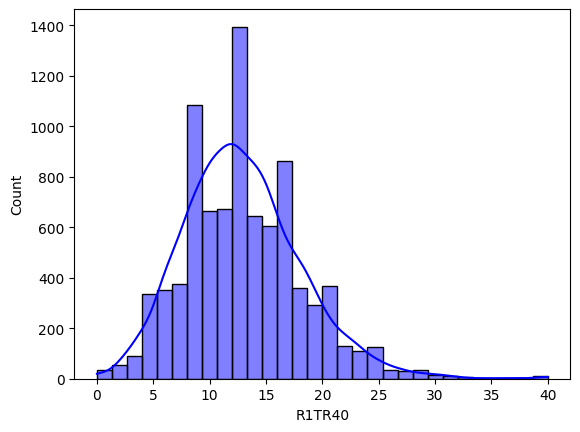

count    8707.000000
mean       12.878029
std         5.265068
min         0.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        40.000000
Name: R1TR40, dtype: float64


In [ ]:
#visualize R1TR40 - y variable
plt.close('all')
sns.histplot(data=wave_one, x="R1TR40", bins=30, kde=True, color="blue")
plt.show()
print(wave_one["R1TR40"].describe())

## Evelyn's work

In [ ]:
# Filter for individuals who are not retired in 2022
non_retired = df[df["R16SAYRET"] == 0]
print(f"Non-retired respondents in 2022: {non_retired.shape[0]}")


Non-retired respondents in 2022: 79


In [ ]:
# Drop missing values
planned_years = non_retired["R16RPLNYA"].dropna()

# Basic statistics
print("Planned Retirement Year Stats:")
print(planned_years.describe())


Planned Retirement Year Stats:
count      20.000000
mean     2026.500000
std         4.784844
min      2022.000000
25%      2023.000000
50%      2025.000000
75%      2029.250000
max      2039.000000
Name: R16RPLNYA, dtype: float64


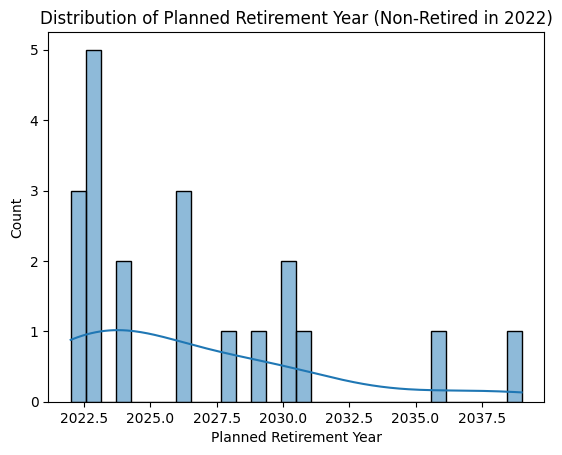

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(planned_years, bins=30, kde=True)
plt.title("Distribution of Planned Retirement Year (Non-Retired in 2022)")
plt.xlabel("Planned Retirement Year")
plt.ylabel("Count")
plt.show()


Most non-retired respondents in 2022 plan to retire soon (between 2022–2026).

There is a long tail—a few plan to retire in the 2030s, possibly due to younger age or flexible job types.

The mode is around 2023–2024.

In [ ]:
non_retired_valid = non_retired[non_retired["R16RPLNYA"].notna()]


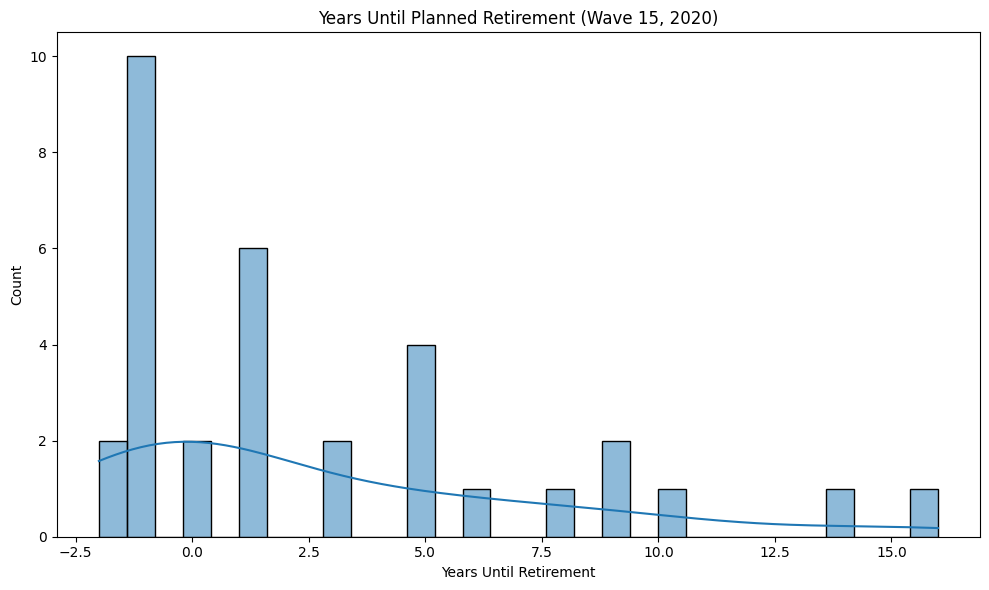

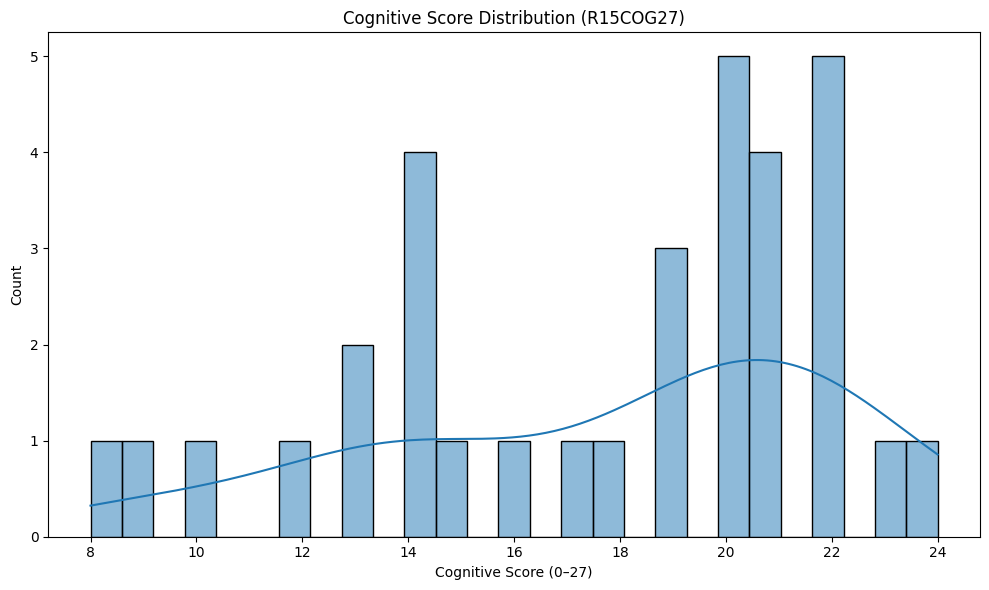

Summary of Selected EDA Variables:
                  count         mean       std     min      25%     50%  \
R15COG27           33.0    17.727273  4.353682     8.0    14.00    19.0   
R15IMRCP           30.0     6.133333  1.431983     2.0     6.00     6.0   
R15DLRCP           30.0     5.333333  2.154920     1.0     3.25     6.0   
R15SER7P           30.0     4.300000  1.368362     0.0     4.00     5.0   
R15SLFMEM          33.0     2.818182  0.768706     1.0     2.00     3.0   
R15RPLNYA          33.0  2024.727273  4.712170  2020.0  2021.00  2023.0   
YearsUntilRetire   33.0     2.727273  4.712170    -2.0    -1.00     1.0   
R15FINR            33.0     0.878788  0.331434     0.0     1.00     1.0   
H15ANYFIN          33.0     0.969697  0.174078     0.0     1.00     1.0   

                     75%     max  
R15COG27            21.0    24.0  
R15IMRCP             7.0     8.0  
R15DLRCP             7.0     8.0  
R15SER7P             5.0     5.0  
R15SLFMEM            3.0     4.0  
R15R

In [46]:
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Filter non-retired individuals with valid planned retirement year
non_retired = df[df["R15SAYRET"] == 0]
non_retired_valid = non_retired[non_retired["R15RPLNYA"].notna()].copy()

# Step 3: Engineer new feature
non_retired_valid["YearsUntilRetire"] = non_retired_valid["R15RPLNYA"] - 2022

# Step 4: Define key variables using corrected names
cog_vars = ["R15COG27", "R15IMRCP", "R15DLRCP", "R15SER7P", "R15SLFMEM"]
health_vars = []  # Skipped for now since R15VIGACT, R15DRINKR are unavailable
career_vars = ["R15RPLNYA", "YearsUntilRetire"]
finance_vars = ["R15FINR", "H15ANYFIN"]  # Example financial responsibility vars

eda_vars = cog_vars + health_vars + career_vars + finance_vars

# Step 5: Summary table
eda_summary = non_retired_valid[eda_vars].describe(include="all").T

# Step 6: Plots
plt.figure(figsize=(10, 6))
sns.histplot(non_retired_valid["YearsUntilRetire"].dropna(), bins=30, kde=True)
plt.title("Years Until Planned Retirement (Wave 15, 2020)")
plt.xlabel("Years Until Retirement")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(non_retired_valid["R15COG27"].dropna(), bins=27, kde=True)
plt.title("Cognitive Score Distribution (R15COG27)")
plt.xlabel("Cognitive Score (0–27)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Step 7: Display summary
print("Summary of Selected EDA Variables:")
print(eda_summary)


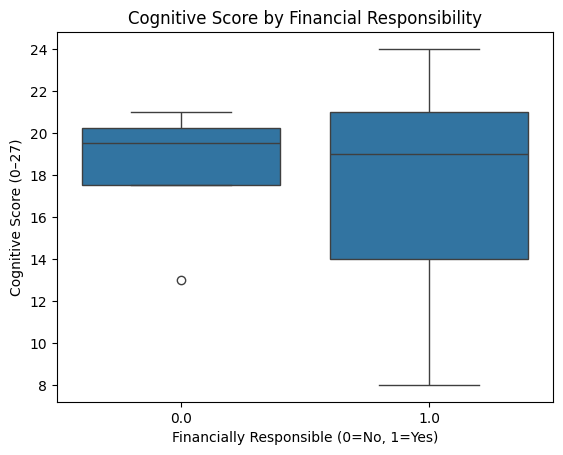

In [47]:
sns.boxplot(data=non_retired_valid, x="R15FINR", y="R15COG27")
plt.title("Cognitive Score by Financial Responsibility")
plt.xlabel("Financially Responsible (0=No, 1=Yes)")
plt.ylabel("Cognitive Score (0–27)")
plt.show()


In [51]:
non_retired_valid["PastPlannedYear"] = non_retired_valid["YearsUntilRetire"] < 0


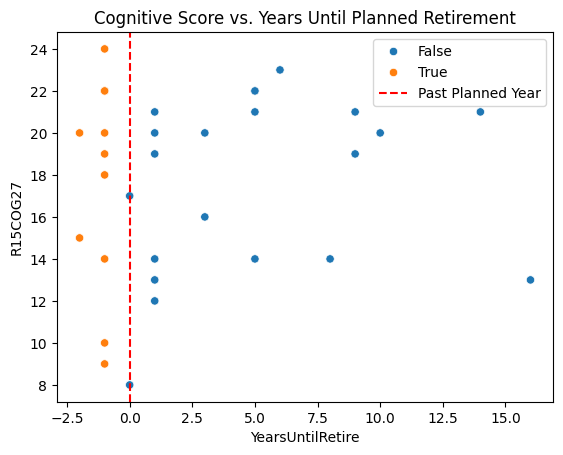

In [52]:
sns.scatterplot(data=non_retired_valid, x="YearsUntilRetire", y="R15COG27", hue="PastPlannedYear")
plt.axvline(0, color="red", linestyle="--", label="Past Planned Year")
plt.title("Cognitive Score vs. Years Until Planned Retirement")
plt.legend()
plt.show()



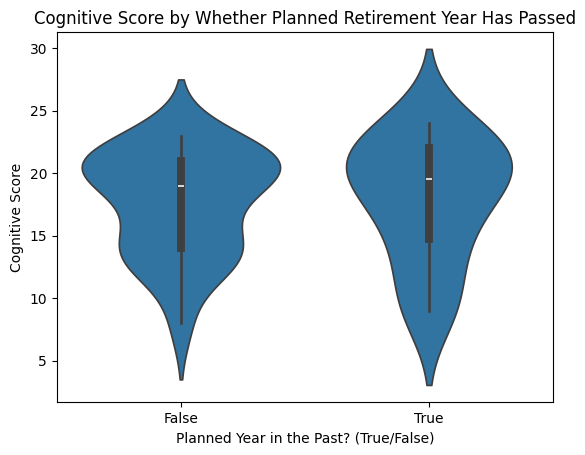

In [53]:
sns.violinplot(data=non_retired_valid, x="PastPlannedYear", y="R15COG27")
plt.title("Cognitive Score by Whether Planned Retirement Year Has Passed")
plt.xlabel("Planned Year in the Past? (True/False)")
plt.ylabel("Cognitive Score")
plt.show()


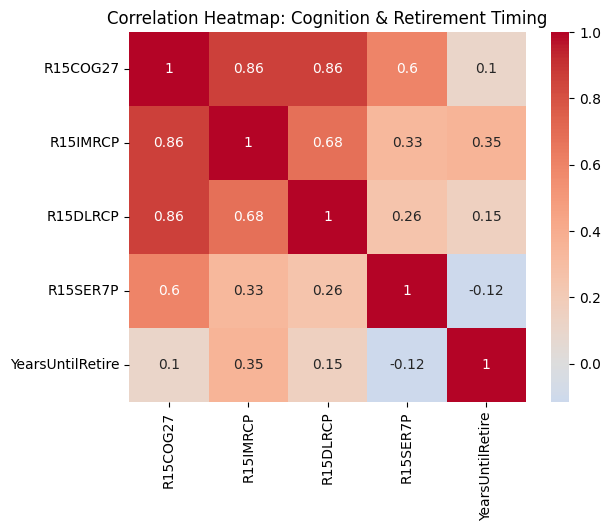

In [54]:
import numpy as np
corr_matrix = non_retired_valid[["R15COG27", "R15IMRCP", "R15DLRCP", "R15SER7P", "YearsUntilRetire"]].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap: Cognition & Retirement Timing")
plt.show()


In [44]:
# List of variables to check
variables_to_check = [
    'R15COG27', 'R15IMRCP', 'R15DLRCP', 'R15SER7P', 'R15SLFMEM',
    'R15VIGACT', 'R15DRINKR', 'R15SELFE', 'R15FINR',
    'H15ANYFIN', 'R15NETWORTH', 'R15IRA', 'R15PENIND'
]

# Check for existence
available_vars = [var for var in variables_to_check if var in df.columns]
missing_vars = [var for var in variables_to_check if var not in df.columns]

# Output results
print("✅ Available variables:")
print(available_vars)
print("\n❌ Missing variables:")
print(missing_vars)


✅ Available variables:
['R15COG27', 'R15IMRCP', 'R15DLRCP', 'R15SER7P', 'R15SLFMEM', 'R15FINR', 'H15ANYFIN']

❌ Missing variables:
['R15VIGACT', 'R15DRINKR', 'R15SELFE', 'R15NETWORTH', 'R15IRA', 'R15PENIND']


In [29]:
!pip install ace_tools

In [32]:
print(", ".join(df.columns))


HHIDPN, S1HHIDPN, R1MSTAT, R1MPART, S1BMONTH, S1BYEAR, S1BDATE, S1BFLAG, S1COHBYR, S1HRSAMP, S1AHDSMP, S1DMONTH, S1DYEAR, S1DDATE, S1DSRC, S1DTIMTDTH, S1DAGE_Y, S1DAGE_M, S1RACEM, S1HISPAN, S1GENDER, S1EDUC, S1EDYRS, S1EDEGRM, S1RELIG, S1VETRN, S1MEDUC, S1FEDUC, S1BPLACE, S1BPLACF, S1IWBEG, S1IWEND, S1IWMID, S1IWMIDF, S1IWSTAT, S1IWENDM, S1IWENDY, S1PROXY, S1IWBEGF, S1IWENDF, S1MSTAT, S1MSTATH, S1MSTATF, S1MRCT, S1MLEN, S1MLENM, S1MCURLN, S1MDIV, S1MWID, S1MEND, S1MNEV, S1MPART, S1OAHDID, S1OHRSID, S1WTRESP, S1WTCRNH, S1CENDIV, S1CENREG, S1URBRUR, S1FINR, S1FAMR, S2HHIDPN, R2MSTAT, R2MPART, S2BMONTH, S2BYEAR, S2BDATE, S2BFLAG, S2COHBYR, S2HRSAMP, S2AHDSMP, S2DMONTH, S2DYEAR, S2DDATE, S2DSRC, S2DTIMTDTH, S2DAGE_Y, S2DAGE_M, S2RACEM, S2HISPAN, S2GENDER, S2EDUC, S2EDYRS, S2EDEGRM, S2RELIG, S2VETRN, S2MEDUC, S2FEDUC, S2BPLACE, S2BPLACF, S2IWBEG, S2IWEND, S2IWMID, S2IWMIDF, S2IWSTAT, S2IWENDM, S2IWENDY, S2PROXY, S2IWBEGF, S2IWENDF, S2MSTAT, S2MSTATH, S2MSTATF, S2MRCT, S2MLEN, S2MLENM, S2MCU